In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [171]:
def apply_feature_eng(df):

    df['Interested'] = np.where(df.VisitorType == 'Returning_Visitor', 1, 0)
    
    encoder = LabelEncoder()
    df['VisitorType']  = encoder.fit_transform(df.VisitorType)
    df['Month']        = encoder.fit_transform(df.Month)
    df['Weekend']      = encoder.fit_transform(df.Weekend)
    
    time_per_page = df['Homepage _Duration']/df.Homepage
    df['Homepage_avg_time'] = np.where(time_per_page.isnull()==True, 0, time_per_page)

    time_per_page = df['Aboutus_Duration']/df.Aboutus
    df['Aboutus_avg_time'] = np.where(time_per_page.isnull()==True, 0, time_per_page)

    time_per_page = df['Contactus_Duration']/df.Contactus
    df['Contactus_avg_time'] = np.where(time_per_page.isnull()==True, 0, time_per_page)
    
    return df

In [62]:
train = pd.read_csv('database/train.csv')
test  = pd.read_csv('database/test.csv', index_col=0)

print('Train Data Shape :', train.shape)
print('Test Data Shape  :', test.shape)

train.head()

Train Data Shape : (10480, 18)
Test Data Shape  : (1850, 17)


,Homepage,Homepage _Duration,Aboutus,Aboutus_Duration,Contactus,Contactus_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Province,TrafficType,VisitorType,Weekend,Revenue
0,1.0,10.0,0.0,0.0,9.0,700.000000,0.000000,0.011111,29.621890,0.0,Dec,2,2,9,10,Returning_Visitor,False,1
1,2.0,15.0,0.0,0.0,10.0,894.666667,0.000000,0.022222,0.000000,0.0,May,2,4,4,2,Returning_Visitor,False,0
2,1.0,85.0,0.0,0.0,14.0,306.500000,0.000000,0.004444,0.000000,0.0,Mar,2,2,3,2,Returning_Visitor,False,0
3,5.0,175.1,0.0,0.0,26.0,615.559524,0.000000,0.002083,62.773672,0.0,Sep,1,1,1,3,New_Visitor,True,1
4,2.0,25.0,0.0,0.0,5.0,40.000000,0.066667,0.083333,0.000000,0.6,May,2,2,1,1,Returning_Visitor,False,0


## Checking out our Target Variable

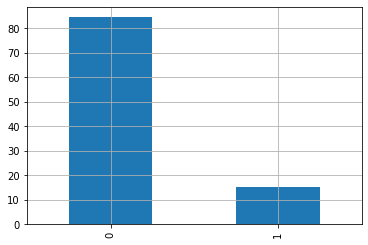

In [63]:
# TARGET VARIABLE
var = 'Revenue'

(train[var].value_counts()/len(train) *100).plot.bar()
plt.grid(1)

We can see that our data is highly imbalanced.

## NaN Features

Text(0.5, 0, 'Features')

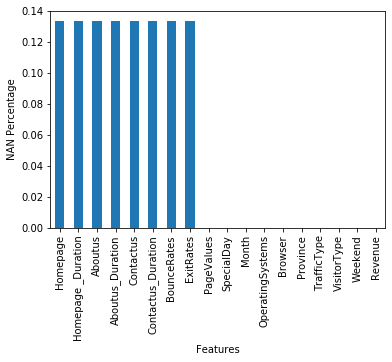

In [64]:
(train.isnull().sum()/len(train) *100).plot.bar()
plt.ylabel('NAN Percentage')
plt.xlabel('Features')

As we can see, the max Nan Percentage is just above 1%, thus, there is no harm in just getting rid of those sample.

NOTE: I checked that the total number of samples that are gonna be dropped is just 14 (approx. 1%), thus ...no harm.

In [65]:
train.dropna(inplace=True)

### Concatinating the train and test Dataset

In [66]:
# target = train[var]

# data = pd.concat([train.drop(var, axis=1), test])

# print(data.shape)
# data.head()

### New Feature --> Interested

Let us quickly create a new feature defining if the customer is even interested or not. If the VisitorType == Returning_Visitor, that means that he/she is somewhat interested.

In [67]:
train['Interested'] = np.where(train.VisitorType == 'Returning_Visitor', 1, 0)

# Getting Rid of the only three 'object/bool' features and converting them to numericals.
encoder = LabelEncoder()
train['VisitorType']  = encoder.fit_transform(train.VisitorType)
train['Month']        = encoder.fit_transform(train.Month)
train['Weekend']      = encoder.fit_transform(train.Weekend)

train.head()

,Homepage,Homepage _Duration,Aboutus,Aboutus_Duration,Contactus,Contactus_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Province,TrafficType,VisitorType,Weekend,Revenue,Interested
0,1.0,10.0,0.0,0.0,9.0,700.000000,0.000000,0.011111,29.621890,0.0,1,2,2,9,10,2,0,1,1
1,2.0,15.0,0.0,0.0,10.0,894.666667,0.000000,0.022222,0.000000,0.0,6,2,4,4,2,2,0,0,1
2,1.0,85.0,0.0,0.0,14.0,306.500000,0.000000,0.004444,0.000000,0.0,5,2,2,3,2,2,0,0,1
3,5.0,175.1,0.0,0.0,26.0,615.559524,0.000000,0.002083,62.773672,0.0,9,1,1,1,3,0,1,1,0
4,2.0,25.0,0.0,0.0,5.0,40.000000,0.066667,0.083333,0.000000,0.6,6,2,2,1,1,2,0,0,1


## Type of Feature

In [149]:
# Discrete Features
cat_f = ['Homepage', 'Aboutus', 'Contactus', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Province', 'TrafficType', 'VisitorType', 'Weekend', 'Interested']

# Continuous Features
num_f = ['Homepage _Duration', 'Aboutus_Duration', 'Contactus_Duration', 'BounceRates', 'ExitRates', 'PageValues']

print('Number of Discrete Features   :', len(cat_f))
print('Number of Continuous Features :', len(num_f))

Number of Discrete Features   : 12
Number of Continuous Features : 6


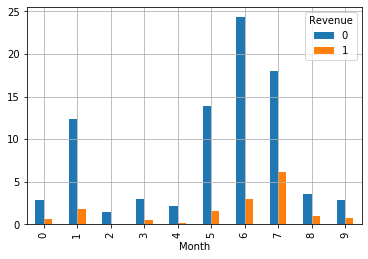

In [140]:
(train.groupby('Month')[var].value_counts().unstack()/len(train) * 100).plot.bar()
plt.grid(1)

### Creating New Features

In [159]:
train.head()

,Homepage,Homepage _Duration,Aboutus,Aboutus_Duration,Contactus,Contactus_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Province,TrafficType,VisitorType,Weekend,Revenue,Interested
0,1.0,10.0,0.0,0.0,9.0,700.000000,0.000000,0.011111,29.621890,0.0,1,2,2,9,10,2,0,1,1
1,2.0,15.0,0.0,0.0,10.0,894.666667,0.000000,0.022222,0.000000,0.0,6,2,4,4,2,2,0,0,1
2,1.0,85.0,0.0,0.0,14.0,306.500000,0.000000,0.004444,0.000000,0.0,5,2,2,3,2,2,0,0,1
3,5.0,175.1,0.0,0.0,26.0,615.559524,0.000000,0.002083,62.773672,0.0,9,1,1,1,3,0,1,1,0
4,2.0,25.0,0.0,0.0,5.0,40.000000,0.066667,0.083333,0.000000,0.6,6,2,2,1,1,2,0,0,1


In [169]:
time_per_page = train['Homepage _Duration']/train.Homepage
train['Homepage_avg_time'] = np.where(time_per_page.isnull()==True, 0, time_per_page)

time_per_page = train['Aboutus_Duration']/train.Aboutus
train['Aboutus_avg_time'] = np.where(time_per_page.isnull()==True, 0, time_per_page)

time_per_page = train['Contactus_Duration']/train.Contactus
train['Contactus_avg_time'] = np.where(time_per_page.isnull()==True, 0, time_per_page)

In [170]:
train

,Homepage,Homepage _Duration,Aboutus,Aboutus_Duration,Contactus,Contactus_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Browser,Province,TrafficType,VisitorType,Weekend,Revenue,Interested,Homepage_avg_time,Aboutus_avg_time,Contactus_avg_time
0,1.0,10.000000,0.0,0.0,9.0,700.000000,0.000000,0.011111,29.621890,0.0,...,2,9,10,2,0,1,1,10.000000,0.0,77.777778
1,2.0,15.000000,0.0,0.0,10.0,894.666667,0.000000,0.022222,0.000000,0.0,...,4,4,2,2,0,0,1,7.500000,0.0,89.466667
2,1.0,85.000000,0.0,0.0,14.0,306.500000,0.000000,0.004444,0.000000,0.0,...,2,3,2,2,0,0,1,85.000000,0.0,21.892857
3,5.0,175.100000,0.0,0.0,26.0,615.559524,0.000000,0.002083,62.773672,0.0,...,1,1,3,0,1,1,0,35.020000,0.0,23.675366
4,2.0,25.000000,0.0,0.0,5.0,40.000000,0.066667,0.083333,0.000000,0.6,...,2,1,1,2,0,0,1,12.500000,0.0,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10475,0.0,0.000000,0.0,0.0,10.0,130.166667,0.055556,0.083333,26.661333,0.0,...,2,1,8,2,0,0,1,0.000000,0.0,13.016667
10476,3.0,37.000000,0.0,0.0,21.0,1231.500000,0.000000,0.016000,0.000000,0.0,...,4,9,8,0,1,1,0,12.333333,0.0,58.642857
10477,6.0,513.833333,0.0,0.0,33.0,2690.333333,0.000000,0.017544,30.218780,0.0,...,4,1,2,2,0,1,1,85.638889,0.0,81.525253
10478,23.0,322.941667,0.0,0.0,62.0,3142.941176,0.003038,0.019685,7.311892,0.0,...,2,1,10,2,1,0,1,14.040942,0.0,50.692600


## Modeling

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [71]:
FEATURES = train.drop(var, axis=1)
TARGET   = train[var]

X_train, X_test, y_train, y_test = train_test_split(FEATURES, TARGET, test_size=0.2, shuffle=True, random_state=1)

In [99]:
rfc = RandomForestClassifier(random_state=2)
rfc.fit(X_train, y_train)

rfc_preds = rfc.predict(X_test)

accuracy_score(y_test, rfc_preds)

0.9044890162368673

In [100]:
gboost = GradientBoostingClassifier(random_state=3)
gboost.fit(X_train, y_train)

gboost_preds = gboost.predict(X_test)

accuracy_score(y_test, gboost_preds)

0.9030563514804203

# Submitting

In [111]:
def submit(df, model):
    df = apply_feature_eng(test)
    preds = model.predict(df)

    submit = pd.DataFrame(preds, columns=['Revenue'])
    submit['ID'] = range(1, len(submit)+1)

    submit.to_csv('database/submission.csv', index=False)

In [113]:
submit(test, model=rfc)

/home/atom/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
